In [1]:
###Statistical tests
#After finishing text mining,the next step is to examine whether particular content in media coverage influence its reach.
# In particular:
# 1. Checking temporal trends in media coverage
# 2. Identify any variance and correlation among themes present in the text

In [2]:
#Loading the data

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('Processed_1.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'Headline', 'URL', 'Opening Text', 'Hit Sentence',
       'Source', 'Country', 'Reach', 'National Viewership', 'Engagement',
       'Sentiment', 'Alternate Date Format', 'Time', 'Social Echo Total',
       'Girl_in_Headline', 'Girl_in_Open', 'Girl_in_Hit', 'Boy_in_Headline',
       'Boy_in_Open', 'Boy_in_Hit', 'Women_in_Headline', 'Women_in_Open',
       'Women_in_Hit', 'Men_in_Headline', 'Men_in_Open', 'Men_in_Hit',
       'Female_in_Headline', 'Female_in_Hit', 'Female_in_Open', 'Female',
       'Male_in_Headline', 'Male_in_Hit', 'Male_in_Open', 'Male',
       'Problems_in_Headline', 'Problems_in_Open', 'Problems_in_Hit',
       'Problems', 'Solutions_in_Headline', 'Solutions_in_Open',
       'Solutions_in_Hit', 'Solutions', 'Activism_in_Hit',
       'Activism_in_Headline', 'Activism_in_Open', 'Activism',
       'Poverty_in_Open', 'Poverty_in_Hit', 'Poverty_in_Headline', 'Poverty',
       'Norm_in_Headline', 'Norm_in_Hit', 'Norm_in_Open', 'Norm',
       'D

In [6]:
#General data: Descriptive statistics

data1=data[['Date', 'Country', 'Reach', 'Engagement','Time', 'Social Echo Total','Female','Male', 'DRR', 'Norm', 'Activism', 'Problems',
       'Solutions', 'Poverty']]

In [7]:
data1['Social_Echo'] = data['Social Echo Total']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19888\1823006840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Social_Echo'] = data['Social Echo Total']


In [8]:
data1.describe()

,Reach,Engagement,Social Echo Total,Female,Male,DRR,Norm,Activism,Problems,Solutions,Poverty,Social_Echo
count,6.655400e+04,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000,66554.000000
mean,3.258713e+06,0.008189,11.958650,0.751856,0.091670,0.012486,0.005950,0.050786,0.143282,0.009586,0.032996,11.958650
std,8.874540e+06,0.225110,578.384139,0.900359,0.358336,0.124321,0.084004,0.262569,0.403202,0.114851,0.207138,578.384139
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.655000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.620000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.382966e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.933907e+08,43.000000,139911.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,139911.000000


In [9]:
#Import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [10]:
#Check the country of publication
data1['Country'].value_counts()

Country
India               44070
Bangladesh           4239
Australia            3894
Pakistan             3181
Malaysia             2349
Philippines          1592
New Zealand          1340
Singapore             975
Vietnam               892
Indonesia             820
Nepal                 607
Hong Kong             592
China                 582
Gambia                337
Thailand              255
Japan                 138
Cambodia              119
South Korea            90
Afghanistan            88
Laos                   83
Taiwan                 81
Macao                  52
Fiji                   50
Myanmar                34
Brunei                 29
Maldives               25
Papua New Guinea       18
Tonga                   6
Vanuatu                 6
Bhutan                  3
Cameroon                3
Solomon Islands         1
North Korea             1
Switzerland             1
Denmark                 1
Name: count, dtype: int64

In [11]:
#Check change of coverage by time
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Year'] = data1['Date'].dt.year
data1['Year'].value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19888\3968184998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date'] = pd.to_datetime(data1['Date'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19888\3968184998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Year'] = data1['Date'].dt.year


Year
2022    19286
2023    18515
2021    15196
2020    13557
Name: count, dtype: int64

In [12]:
# It's apparent that the number of coverage increased each year (2023 data is cut off at August)

<Axes: xlabel='Year'>

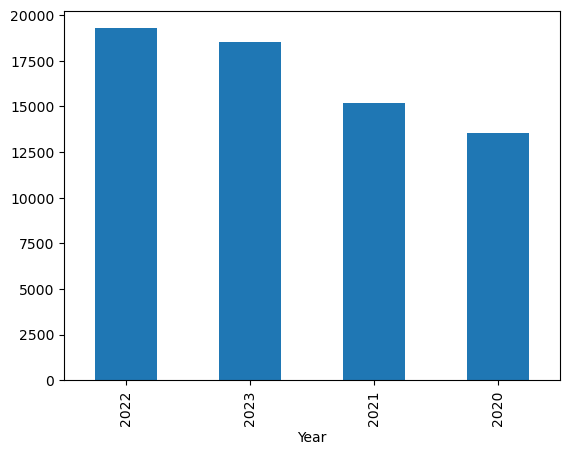

In [14]:
#ploting coverage over time
data1['Year'].value_counts().plot(kind='bar')

In [17]:
#Check changes in Reach,Engagement, Social echo by year (mean)
data1.groupby('Year')[['Reach','Engagement','Social_Echo']].mean().reset_index()

,Year,Reach,Engagement,Social_Echo
0,2020,2.767385e+06,0.000000,0.014089
1,2021,3.915787e+06,0.000000,0.000526
2,2022,2.837846e+06,0.013326,28.783574
3,2023,3.517577e+06,0.015555,12.993627


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


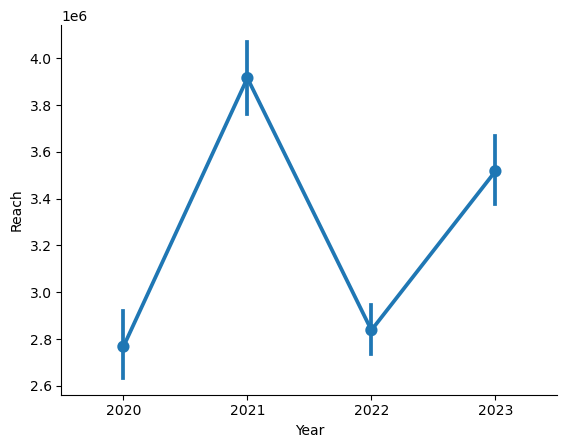

In [18]:
#Let's plot reach over year
fig = sns.pointplot(x='Year', y = 'Reach', data = data1)
sns.despine()

In [19]:
#Statistical test: ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Reach ~ Year'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Year,8.320887e+14,1.0,10.566725,0.001152
Residual,5.240713e+18,66552.0,NaN,NaN


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


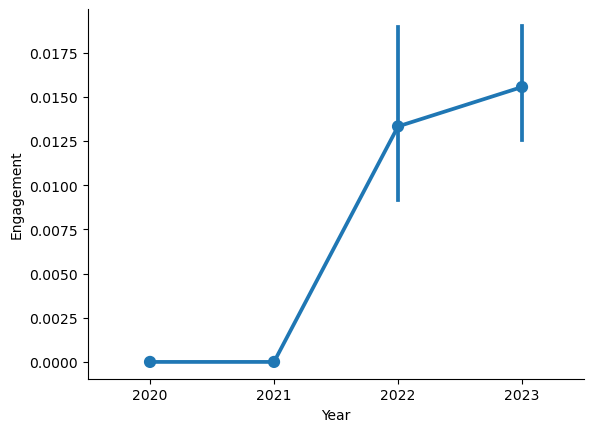

In [20]:
#Let's plot engagement over year
fig = sns.pointplot(x='Year', y = 'Engagement', data = data1)
sns.despine()

In [21]:
#ANOVA: engagement - year
formula = 'Engagement ~ Year'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Year,2.935198,1.0,57.972214,2.693383e-14
Residual,3369.601885,66552.0,NaN,NaN


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


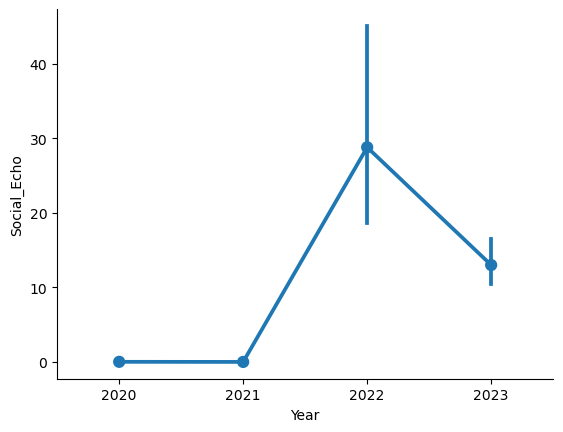

In [22]:
#Let's plot engagement over year
fig = sns.pointplot(x='Year', y = 'Social_Echo', data = data1)
sns.despine()

In [23]:
formula = 'Social_Echo ~ Year'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Year,3.466572e+06,1.0,10.364027,0.001286
Residual,2.226039e+10,66552.0,NaN,NaN


In [24]:
#Check changes in Reach,Engagement, Social echo by year (sum)
data1.groupby('Year')[['Reach','Engagement','Social_Echo']].sum().reset_index()

,Year,Reach,Engagement,Social_Echo
0,2020,3.751744e+10,0.0,191.0
1,2021,5.950429e+10,0.0,8.0
2,2022,5.473070e+10,257.0,555120.0
3,2023,6.512793e+10,288.0,240577.0


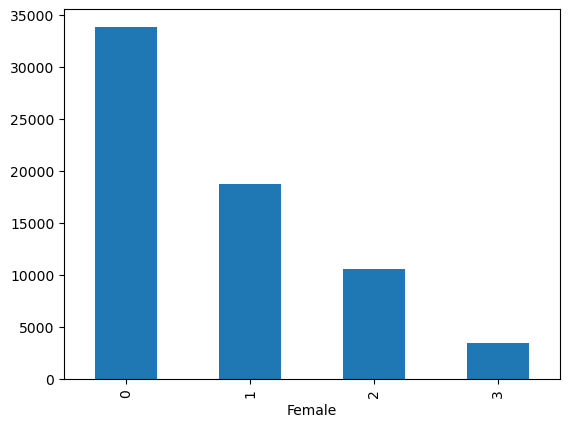

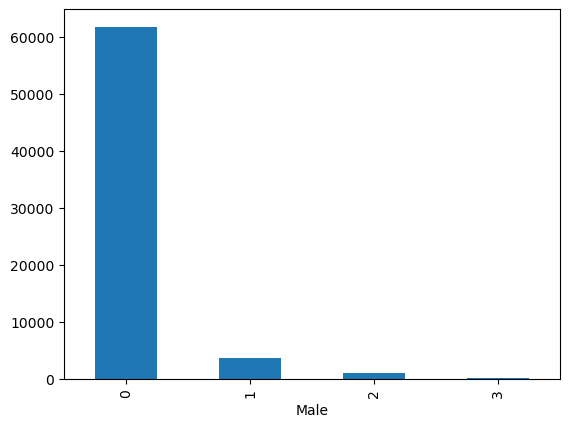

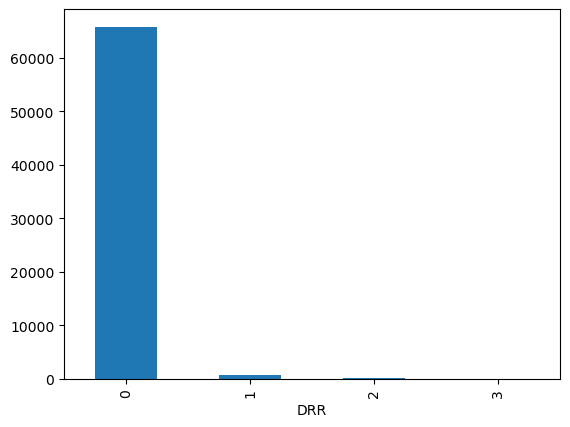

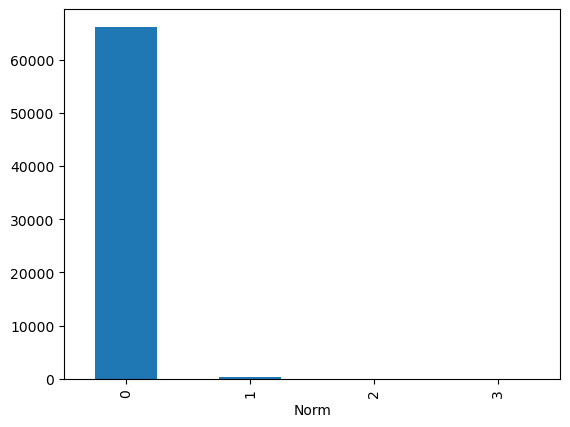

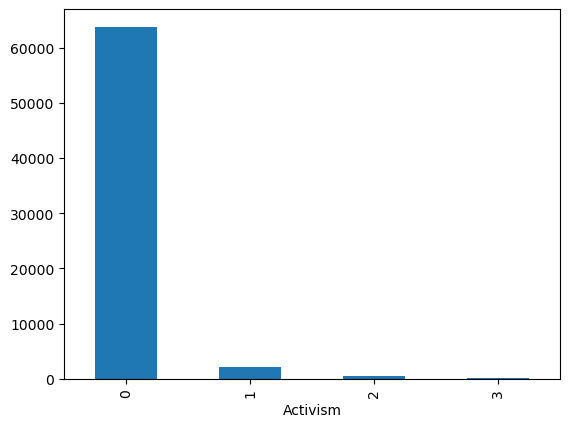

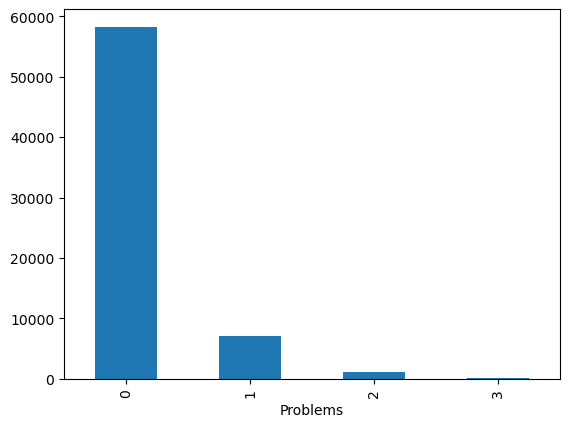

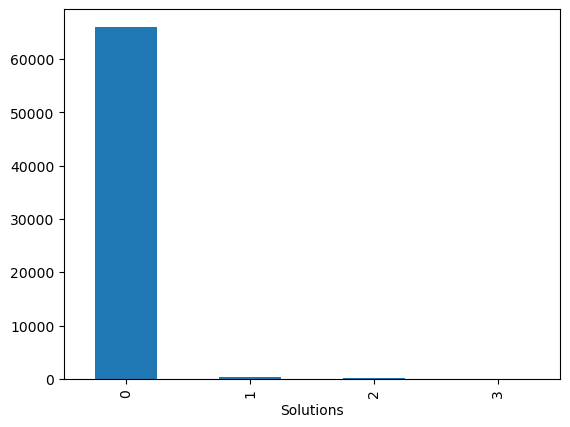

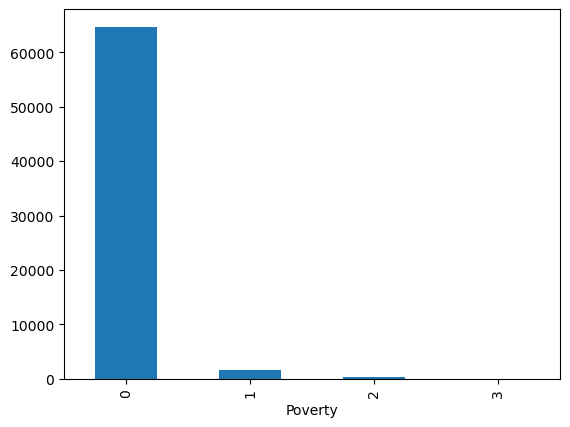

In [25]:
#Testing presence variables
#Visualize all presence variables
presence_data = data[['Female','Male', 'DRR', 'Norm', 'Activism', 'Problems',
       'Solutions', 'Poverty']]
for column_name in presence_data:
    presence_data[column_name].value_counts().plot(kind='bar')
    plt.show()

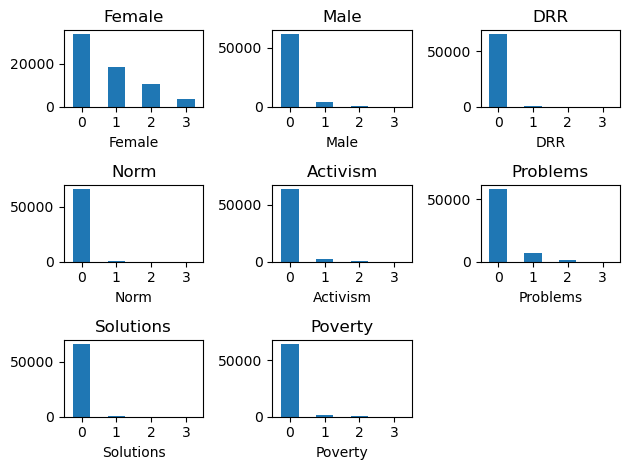

In [26]:
#Another way to arrange the graph
import math

size = math.ceil(presence_data.shape[1]** (1/2))
fig = plt.figure()

for i, col in enumerate(presence_data.columns):
    fig.add_subplot(size, size, i + 1)
    presence_data[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()

In [27]:
# Check if presence variables are normally distributed. Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(data1['Female'])
print(result)
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
     print('Probably Gaussian at the %.1f%% level' % (sl))
 else:
     print('Probably not Gaussian at the %.1f%% level' % (sl))

AndersonResult(statistic=6180.593890291726, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.751855636024882, scale=0.9003585886533706)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [28]:
#Using Shapiro-Wilk normality test
from scipy.stats import shapiro
shapiro(data1['Female'])

C:\Users\lenovo\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7734106183052063, pvalue=0.0)

In [29]:
#the p-value is 0.000 which is less than the alpha(0.05) then we reject the null hypothesis i.e. 
#we have sufficient evidence to say that sample does not come from a normal distribution.

In [30]:
shapiro(data1['Male'])

ShapiroResult(statistic=0.27448248863220215, pvalue=0.0)

In [31]:
shapiro(data1['DRR'])

ShapiroResult(statistic=0.07425558567047119, pvalue=0.0)

In [32]:
shapiro(data1['Norm'])

ShapiroResult(statistic=0.043130457401275635, pvalue=0.0)

In [33]:
shapiro(data1['Activism'])

ShapiroResult(statistic=0.19121748208999634, pvalue=0.0)

In [34]:
shapiro(data1['Problems'])

ShapiroResult(statistic=0.39242100715637207, pvalue=0.0)

In [35]:
shapiro(data1['Solutions'])

ShapiroResult(statistic=0.05630284547805786, pvalue=0.0)

In [36]:
shapiro(data1['Poverty'])

ShapiroResult(statistic=0.14612627029418945, pvalue=0.0)

In [39]:
#Plotting Female and Male presence

<Axes: xlabel='Female'>

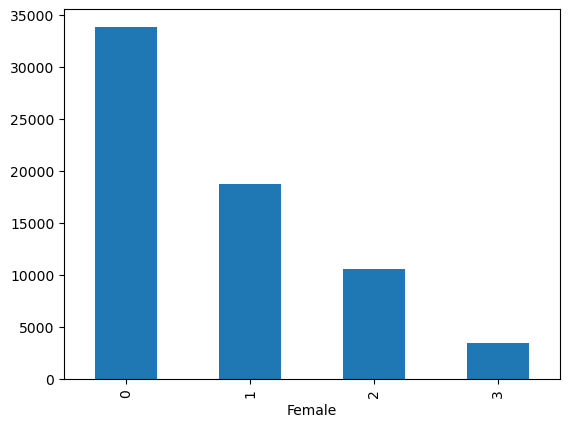

In [40]:
data1['Female'].value_counts()[data1['Female'].unique()].plot(kind='bar')

<Axes: xlabel='Male'>

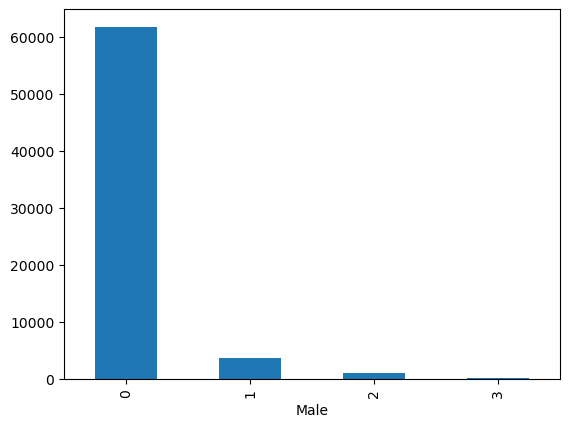

In [41]:
data1['Male'].value_counts()[data1['Male'].unique()].plot(kind='bar')

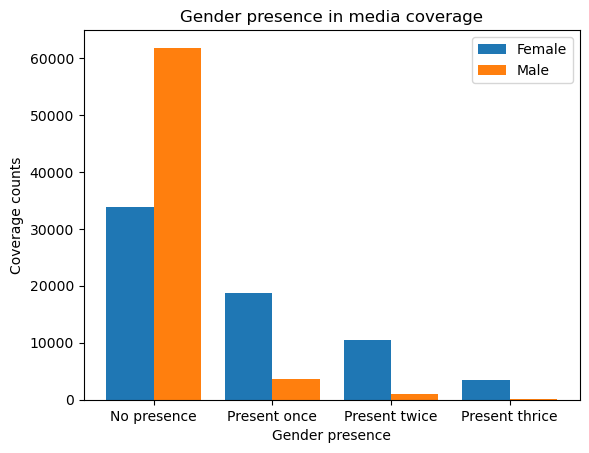

In [42]:
import numpy as np
import matplotlib.pyplot as plt

X = ["No presence", "Present once", "Present twice", "Present thrice"]

Female = data1['Female'].value_counts()
Female = Female.tolist()
Male = data1['Male'].value_counts()
Male = Male.tolist()

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, Male, 0.4, label = 'Male')

plt.xticks(X_axis, X)
plt.xlabel("Gender presence")
plt.ylabel("Coverage counts")
plt.title("Gender presence in media coverage")

plt.legend()
plt.show()

In [43]:
#We can see some apparent difference here, so let's do a mean comparison
from scipy.stats import f_oneway
f_oneway(data1['Female'],data1['Male'])

F_onewayResult(statistic=30889.973087375376, pvalue=0.0)

In [44]:
#the one-way ANOVA test with p-value <0.001 so it signifies that there is difference 

In [45]:
# Let's check if there is correlation between Female and Male presence with a Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(data1['Female'], data1['Male'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.143, p=0.000
Probably dependent


In [46]:
#Another way to test
import scipy
x = data1['Female']
y = data['Male']
scipy.stats.pearsonr(x, y)    # Pearson's r

PearsonRResult(statistic=0.1430663294754249, pvalue=2.9563854949084387e-301)

In [47]:
#All results show that there is positive correlation between Female and Male presence, though the correlation is really weak.

In [48]:
#Form a covariance matrix of all presence variables
presence_data.corr(method='pearson', min_periods=1, numeric_only=False)

,Female,Male,DRR,Norm,Activism,Problems,Solutions,Poverty
Female,1.000000,0.143066,-0.019168,0.021508,-0.004848,-0.007231,-0.035990,-0.015797
Male,0.143066,1.000000,-0.007480,-0.004144,-0.023291,-0.053679,-0.007844,-0.027188
DRR,-0.019168,-0.007480,1.000000,-0.007114,-0.011601,-0.023101,0.000036,0.017843
Norm,0.021508,-0.004144,-0.007114,1.000000,-0.009613,0.024071,0.000317,0.011168
Activism,-0.004848,-0.023291,-0.011601,-0.009613,1.000000,-0.019344,0.005779,-0.015892
Problems,-0.007231,-0.053679,-0.023101,0.024071,-0.019344,1.000000,0.041073,0.015356
Solutions,-0.035990,-0.007844,0.000036,0.000317,0.005779,0.041073,1.000000,0.005652
Poverty,-0.015797,-0.027188,0.017843,0.011168,-0.015892,0.015356,0.005652,1.000000


             Female      Male       DRR      Norm  Activism  Problems  \
Female     1.000000  0.143066 -0.019168  0.021508 -0.004848 -0.007231   
Male       0.143066  1.000000 -0.007480 -0.004144 -0.023291 -0.053679   
DRR       -0.019168 -0.007480  1.000000 -0.007114 -0.011601 -0.023101   
Norm       0.021508 -0.004144 -0.007114  1.000000 -0.009613  0.024071   
Activism  -0.004848 -0.023291 -0.011601 -0.009613  1.000000 -0.019344   
Problems  -0.007231 -0.053679 -0.023101  0.024071 -0.019344  1.000000   
Solutions -0.035990 -0.007844  0.000036  0.000317  0.005779  0.041073   
Poverty   -0.015797 -0.027188  0.017843  0.011168 -0.015892  0.015356   

           Solutions   Poverty  
Female     -0.035990 -0.015797  
Male       -0.007844 -0.027188  
DRR         0.000036  0.017843  
Norm        0.000317  0.011168  
Activism    0.005779 -0.015892  
Problems    0.041073  0.015356  
Solutions   1.000000  0.005652  
Poverty     0.005652  1.000000  


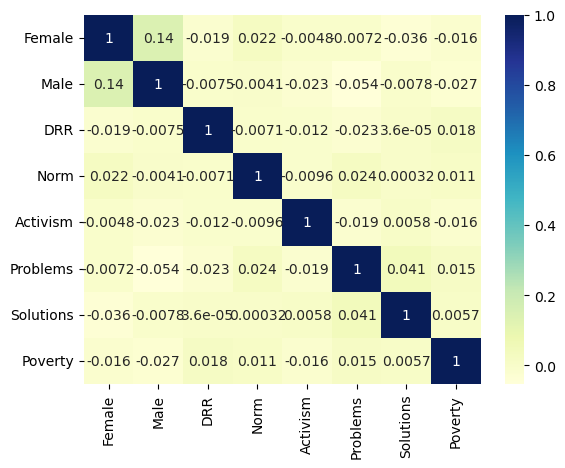

In [49]:
# view a heatmap
print(presence_data.corr()) 
  
# plotting correlation heatmap 
dataplot = sns.heatmap(presence_data.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

In [50]:
#The heatmap shows that except for very weak correlation between Male and Female presence, 
#there is nearly no covariance between any two presence variable.

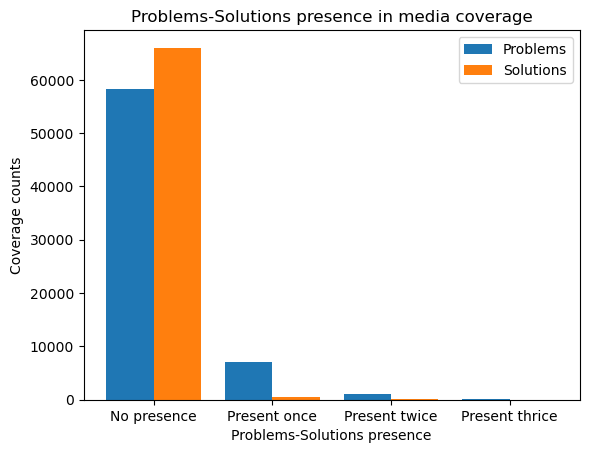

In [51]:
#Comparison between problems and solutions presence
#Ploting
X = ["No presence", "Present once", "Present twice", "Present thrice"]

Problems = data1['Problems'].value_counts()
Problems = Problems.tolist()
SOlutions = data1['Solutions'].value_counts()
Solutions = SOlutions.tolist()

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Problems, 0.4, label = 'Problems')
plt.bar(X_axis + 0.2, Solutions, 0.4, label = 'Solutions')

plt.xticks(X_axis, X)
plt.xlabel("Problems-Solutions presence")
plt.ylabel("Coverage counts")
plt.title("Problems-Solutions presence in media coverage")

plt.legend()
plt.show()

In [52]:
#mean comparison
f_oneway(data1['Problems'],data1['Solutions'])

F_onewayResult(statistic=6768.361336967177, pvalue=0.0)

In [53]:
stat, p = pearsonr(data1['Problems'], data1['Solutions'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=0.041, p=0.000
Probably dependent


In [54]:
#Checking the influence of female presence on reach, engagement and social echo
#Desciption of the data
data1.groupby('Female', as_index=False)[['Reach', 'Engagement', 'Social_Echo']].mean()

,Female,Reach,Engagement,Social_Echo
0,0,3.533866e+06,0.007970,14.719228
1,1,2.827150e+06,0.011220,9.288561
2,2,2.990800e+06,0.004358,10.351682
3,3,3.723968e+06,0.005582,4.148649


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


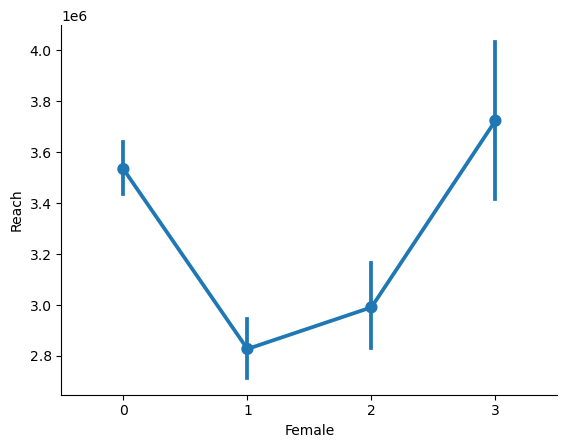

In [55]:
#Let's visualize the relation between Reach and female mention here
import seaborn as sns

fig = sns.pointplot(x='Female', y = 'Reach', data = data1)
sns.despine()

In [56]:
#let's do an ANOVA to see
formula = 'Reach ~ Female'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,1.495369e+15,1.0,18.992149,0.000013
Residual,5.240049e+18,66552.0,NaN,NaN


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


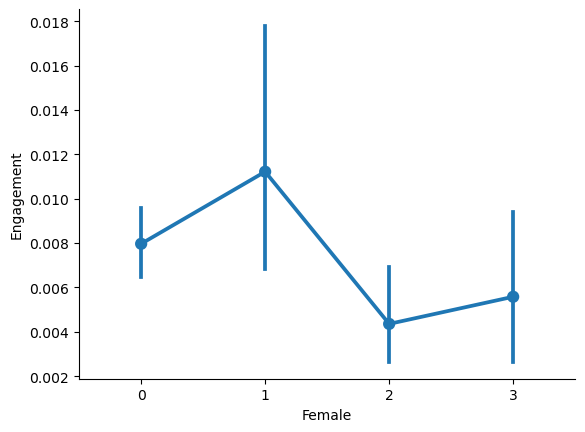

In [57]:
#Let's visualize the relation between Engagement and female mention here

fig = sns.pointplot(x='Female', y = 'Engagement', data = data1)
sns.despine()

In [58]:
formula = 'Engagement ~ Female'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,0.047760,1.0,0.942492,0.331641
Residual,3372.489322,66552.0,NaN,NaN


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


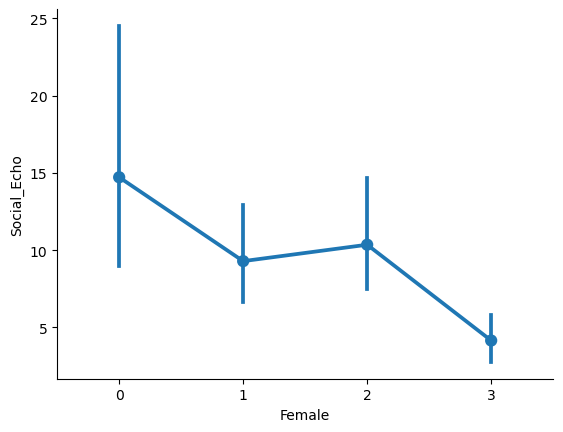

In [59]:
#Let's visualize the relation between social echo and female mention here

fig = sns.pointplot(x='Female', y = 'Social_Echo', data = data1)
sns.despine()

In [60]:
formula = 'Social_Echo ~ Female'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,4.964315e+05,1.0,1.483986,0.223156
Residual,2.226336e+10,66552.0,NaN,NaN


In [61]:
#let's do another ANOVA to see
formula = 'Reach ~ Female+Male'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Female,3.376375e+15,1.0,43.039360,5.404134e-11
Male,1.922039e+16,1.0,245.006368,3.996027e-55
Residual,5.220829e+18,66551.0,NaN,NaN


In [62]:
#let's do another ANOVA to see how other variables differ in Reach

formula = 'Reach ~ DRR+Norm+Activism+Problems+Solutions+Poverty'

model = ols(formula, data=data1).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
DRR,9.209031e+13,1.0,1.170993,2.792013e-01
Norm,1.100937e+14,1.0,1.399918,2.367415e-01
Activism,1.250361e+14,1.0,1.589921,2.073418e-01
Problems,7.795457e+15,1.0,99.124691,2.461823e-23
Solutions,8.842250e+12,1.0,0.112435,7.373894e-01
Poverty,9.558835e+12,1.0,0.121547,7.273635e-01
Residual,5.233452e+18,66547.0,NaN,NaN


In [63]:
test1= ols('Reach ~ Female+Male+DRR+Norm+Activism+Problems+Solutions+Poverty', data=data1).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.29
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.71e-71
Time:                        16:25:49   Log-Likelihood:            -1.1590e+06
No. Observations:               66554   AIC:                         2.318e+06
Df Residuals:                   66545   BIC:                         2.318e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.412e+06    4.8e+04     71.155      0.0

In [64]:
test2= ols('Engagement ~ Female+Male+DRR+Norm+Activism+Problems+Solutions+Poverty', data=data1).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.29
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.71e-71
Time:                        16:25:51   Log-Likelihood:            -1.1590e+06
No. Observations:               66554   AIC:                         2.318e+06
Df Residuals:                   66545   BIC:                         2.318e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.412e+06    4.8e+04     71.155      0.0

In [65]:
test3= ols('Social_Echo ~ Female+Male+DRR+Norm+Activism+Problems+Solutions+Poverty', data=data1).fit()
print(test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.29
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.71e-71
Time:                        16:25:52   Log-Likelihood:            -1.1590e+06
No. Observations:               66554   AIC:                         2.318e+06
Df Residuals:                   66545   BIC:                         2.318e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.412e+06    4.8e+04     71.155      0.0